In [1]:
%matplotlib inline
import math as m
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from SAMPEX_functions import read_counts as read
from SAMPEX_functions import mb_finder, read_days, mb_magnitude, iso_calculator, OrbAtt_augment_loop
import pandas as pd
import os
import pathlib
import string
import datetime
import scipy.stats

In [2]:
file = 'E:\SAMPEX_Data\\1993_data\\orbatt_test.txt'
OrbAtt_file = pd.read_csv(file, names = ['day', 'hr', 'min', 'sec', 'GEO_Radius', 'GEO_Long', \
                                         'GEO_Lat', 'Altitude', 'B_mag'], sep = '\s+', header = 70)
t = (OrbAtt_file['hr'].values)*3600 + (OrbAtt_file['min'].values)*60 + (OrbAtt_file['sec'].values)

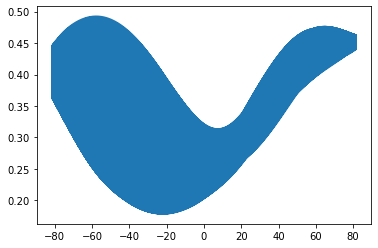

In [3]:
plt.plot(OrbAtt_file['GEO_Lat'].values, OrbAtt_file['B_mag'].values);

In [4]:
file = 'E:\SAMPEX_Data\\1993_data\\OrbAtt_loss_cone.txt'
OrbAtt_file = pd.read_csv(file, names = ['day', 'hr', 'min', 'sec', 'GEO_Radius', \
                                         'GEO_Long', 'GEO_Lat', 'Altitude', 'L_Shell', \
                                         'Loss_Cone_1', 'Loss_Cone_2'], sep = '\s+', header = 70)
t = (OrbAtt_file['hr'].values)*3600 + (OrbAtt_file['min'].values)*60 + (OrbAtt_file['sec'].values)

In [7]:
print(OrbAtt_file['Loss_Cone_1'].values)

[62.815  62.8159 62.8207 ... 63.4209 63.4283 63.4427]


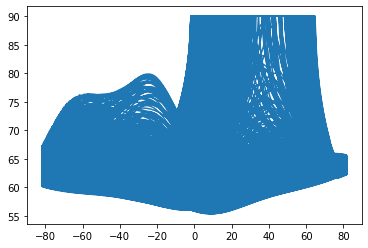

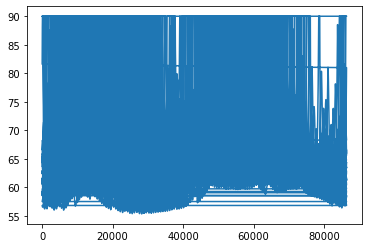

In [15]:
plt.plot(OrbAtt_file['GEO_Lat'].values, OrbAtt_file['Loss_Cone_2'].values);
plt.show()
plt.plot(t, OrbAtt_file['Loss_Cone_2'].values);

In [16]:
file = 'E:\SAMPEX_Data\\1993_data\\OrbAtt_blc.txt'
OrbAtt_file = pd.read_csv(file, names = ['day', 'hr', 'min', 'sec', 'GEO_Radius', \
                                         'GEO_Long', 'GEO_Lat', 'Altitude', 'L_Shell', \
                                         'MLT', 'Equator_B_Mag', 'N100km_B_Mag', 'S100km_B_Mag'], sep = '\s+', header = 70)
t = (OrbAtt_file['hr'].values)*3600 + (OrbAtt_file['min'].values)*60 + (OrbAtt_file['sec'].values)

In [23]:
def blc_lim(Bi, Bf):
    angle_rad = np.sqrt(Bi/Bf)
    angle = angle_rad*(180/np.pi)
    return angle

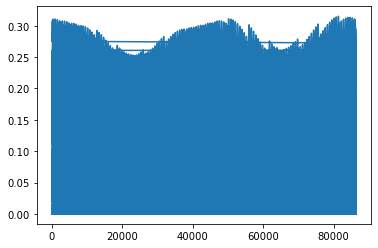

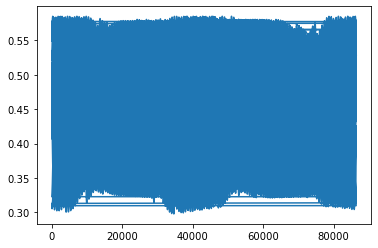

[ 0.37569783  0.39931824  0.43334884 ...  9.62874944  9.85021203
 10.07383247]


Text(0.5, 0, 'BLC limit angle (degrees)')

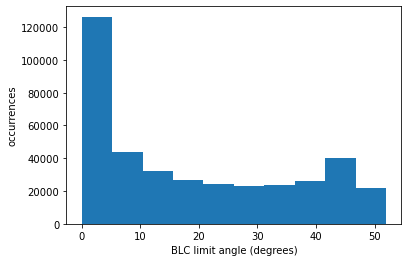

In [28]:
plt.plot(t, OrbAtt_file['Equator_B_Mag'].values);
plt.show()
plt.plot(t, OrbAtt_file['N100km_B_Mag'].values);
plt.show()

blc_angle = blc_lim(OrbAtt_file['Equator_B_Mag'].values,OrbAtt_file['N100km_B_Mag'].values)
print(blc_angle)
plt.hist(blc_angle);
plt.ylabel('occurrences')
plt.xlabel('BLC limit angle (degrees)')